In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

Mounted at /content/drive


In [ ]:
model1 = model1 = keras.models.load_model('/content/drive/My Drive/ai_project/model/encoder-decoder2.keras')

In [ ]:
n = 30 # 30일간 데이터 input
test_num = 10 # 10일간 데이터 output

In [ ]:
df_forplot = df[-test_num:]

In [ ]:
df = df[:-test_num]

In [ ]:
# 이후 10일 데이터 예측
X = np.array([df['value'].values[i:i+n] for i in range(len(df)-n-test_num+1)])
y = np.array([df['value'].values[i+n:i+n+test_num] for i in range(len(df)-n-test_num+1)])

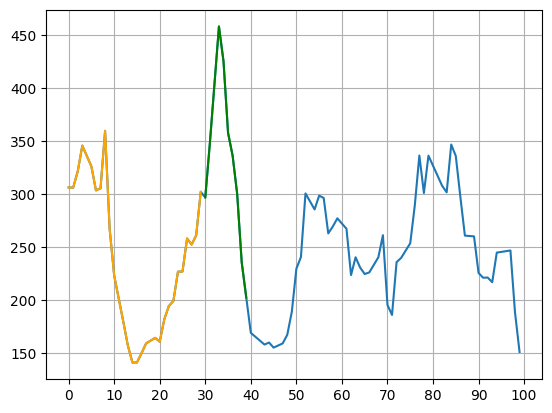

In [ ]:
plt.plot(df['value'].values[:100])
plt.plot(X[0], color='orange')
plt.plot(range(30, 30+test_num), y[0], color='green')
plt.xticks([10*i for i in range(11)])
plt.grid(True)

In [ ]:
X.shape, y.shape

((25940, 30), (25940, 10))

In [ ]:
X = X.reshape((-1, 30, 1))
y = y.reshape((-1, 10, 1))
X.shape, y.shape

((25940, 30, 1), (25940, 10, 1))

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import Input

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20752, 30, 1), (5188, 30, 1), (20752, 10, 1), (5188, 10, 1))

In [ ]:
X_train[0], y_train[0]

(array([[88.6],
        [91.5],
        [89.3],
        [95.1],
        [96.5],
        [97.1],
        [98.9],
        [94.7],
        [94.1],
        [92.8],
        [94.2],
        [96. ],
        [93.7],
        [93. ],
        [93.9],
        [91.5],
        [92.4],
        [93.1],
        [90.1],
        [90.7],
        [89.5],
        [88.6],
        [86.9],
        [88.2],
        [86.7],
        [86.2],
        [86. ],
        [85.1],
        [85.1],
        [87.9]]),
 array([[87.4],
        [87.5],
        [83.6],
        [81.6],
        [82. ],
        [81.5],
        [82.3],
        [83.5],
        [83.5],
        [87.2]]))

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

In [ ]:
input_length = 30
input_dim = 1
output_length = 10
output_dim = 1

In [ ]:
encoder_inputs = Input(shape=(30, 1))
encoder = LSTM(100, return_state=True)
encoder_ouputs, state_h, state_c = encoder(encoder_inputs)

encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(10, 1))

decoder_lstm = LSTM(100, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(1, activation='relu')
decoder_outputs = decoder_dense(decoder_outputs)

model1 = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30, 1)]              0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 10, 1)]              0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 100),                40800     ['input_1[0][0]']             
                              (None, 100),                                                        
                              (None, 100)]                                                        
                                                                                              

In [ ]:
y_train.shape

(20752, 10, 1)

In [ ]:
encoder_input_data = X_train
y_train_temp = y_train.reshape(-1, 10, 1)
decoder_input_data = np.zeros_like(y_train_temp)
decoder_input_data[:, 1:, 0] = y_train_temp[:, :-1, 0]
decoder_target_data = y_train_temp

In [ ]:
history1 = model1.fit([encoder_input_data, decoder_input_data],
                      decoder_target_data,
                      epochs=50,
                      batch_size=32,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/50
519/519 [==============================] - 15s 11ms/step - loss: 10873.2725 - mae: 88.0548 - val_loss: 6732.3135 - val_mae: 62.5849
Epoch 2/50
519/519 [==============================] - 4s 7ms/step - loss: 5008.1011 - mae: 50.5712 - val_loss: 3694.4104 - val_mae: 43.5281
Epoch 3/50
519/519 [==============================] - 4s 7ms/step - loss: 3027.2268 - mae: 39.1059 - val_loss: 2412.1006 - val_mae: 34.9093
Epoch 4/50
519/519 [==============================] - 4s 8ms/step - loss: 1825.0789 - mae: 26.5647 - val_loss: 1270.3076 - val_mae: 19.2813
Epoch 5/50
519/519 [==============================] - 5s 9ms/step - loss: 999.7516 - mae: 15.9548 - val_loss: 733.5734 - val_mae: 12.9268
Epoch 6/50
519/519 [==============================] - 4s 7ms/step - loss: 604.8018 - mae: 11.3771 - val_loss: 458.0089 - val_mae: 9.6409
Epoch 7/50
519/519 [==============================] - 4s 7ms/step - loss: 390.3533 - mae: 8.7415 - val_loss: 301.6537 - val_mae: 7.6396
Epoch 8/50
519/519 [======

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

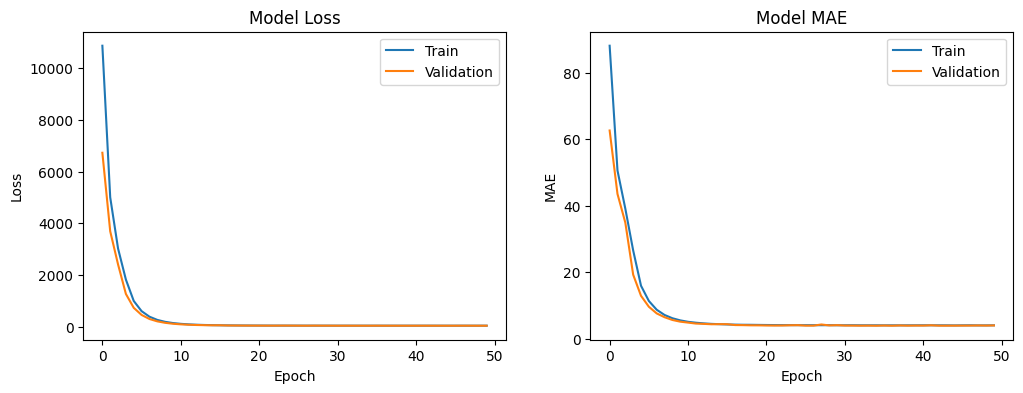

In [ ]:
plot_result(history1)

### 7

In [ ]:
hidden_size = 200

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, RepeatVector, Dense

# Encoder
encoder_inputs = Input(shape=(30, 1))  # 30 time steps, 1 feature
encoder = LSTM(hidden_size, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = RepeatVector(10)(encoder_outputs)  # 10 time steps
decoder_lstm = LSTM(hidden_size, return_sequences=True)
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(1)  # Assuming 1 feature in the output
decoder_outputs = decoder_dense(decoder_outputs)

# Model
model2 = Model(encoder_inputs, decoder_outputs)

model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 30, 1)]              0         []                            
                                                                                                  
 lstm_10 (LSTM)              [(None, 200),                161600    ['input_7[0][0]']             
                              (None, 200),                                                        
                              (None, 200)]                                                        
                                                                                                  
 repeat_vector_4 (RepeatVec  (None, 10, 200)              0         ['lstm_10[0][0]']             
 tor)                                                                                       

In [ ]:
history2 = model2.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/30
519/519 [==============================] - 51s 11ms/step - loss: 7535.9214 - mae: 66.5378 - val_loss: 3445.1367 - val_mae: 39.8009
Epoch 2/30
519/519 [==============================] - 6s 13ms/step - loss: 2143.3396 - mae: 28.2214 - val_loss: 1274.5826 - val_mae: 20.7881
Epoch 3/30
519/519 [==============================] - 4s 8ms/step - loss: 971.8366 - mae: 18.3063 - val_loss: 716.6770 - val_mae: 16.1216
Epoch 4/30
519/519 [==============================] - 4s 8ms/step - loss: 621.2080 - mae: 14.9919 - val_loss: 534.2324 - val_mae: 14.7904
Epoch 5/30
519/519 [==============================] - 6s 11ms/step - loss: 513.5153 - mae: 13.8656 - val_loss: 448.4911 - val_mae: 12.7961
Epoch 6/30
519/519 [==============================] - 5s 9ms/step - loss: 445.6947 - mae: 13.0702 - val_loss: 413.5947 - val_mae: 12.5750
Epoch 7/30
519/519 [==============================] - 4s 8ms/step - loss: 411.9180 - mae: 12.7547 - val_loss: 381.1455 - val_mae: 12.3982
Epoch 8/30
519/519 [======

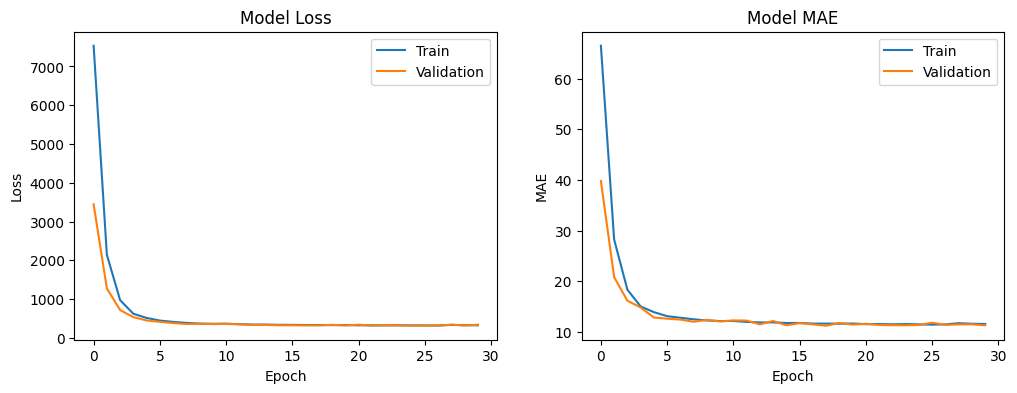

In [ ]:
plot_result(history2)

In [ ]:
pred_model2 = model2.predict(X_test)

163/163 [==============================] - 1s 4ms/step


In [ ]:
pred_model2.shape

(5188, 10, 1)

In [ ]:
pred_model2[0]

array([[74.15664 ],
       [73.34931 ],
       [72.41789 ],
       [72.51409 ],
       [72.63142 ],
       [72.741394],
       [73.0628  ],
       [74.24514 ],
       [75.52989 ],
       [75.83747 ]], dtype=float32)

In [ ]:
y_test[0]

array([[72.5],
       [71.6],
       [72.1],
       [72.3],
       [71.5],
       [71.1],
       [72.5],
       [71.5],
       [70.5],
       [70.5]])

In [ ]:
from keras.metrics import mean_squared_error
import tensorflow as tf

# Calculate MSE
mse = tf.keras.losses.MeanSquaredError()
error = mse(y_test, pred_model2).numpy()

print("Mean Squared Error on Test Data:", error)

Mean Squared Error on Test Data: 319.55026


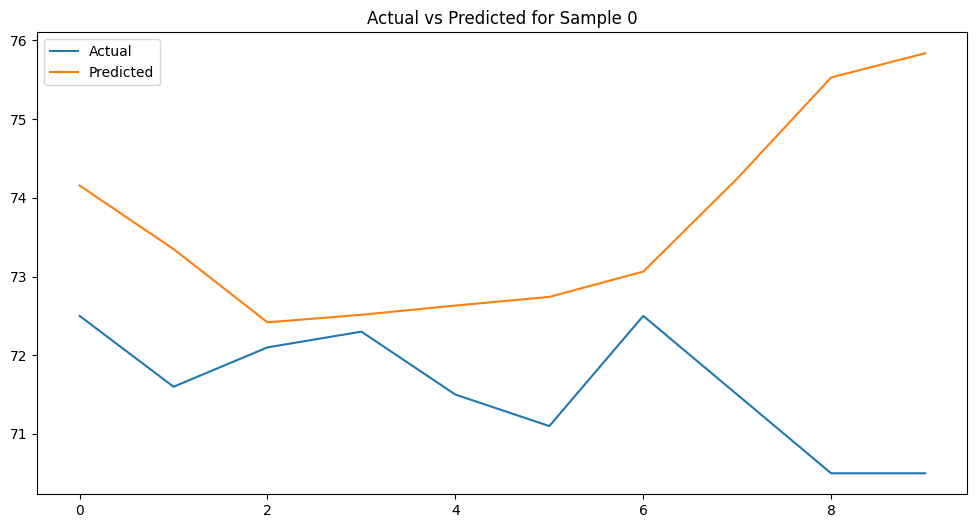

In [ ]:
import matplotlib.pyplot as plt

# Choose a sample or a few samples to plot
sample_index = 0  # Change this to look at different samples

plt.figure(figsize=(12, 6))
plt.plot(y_test[sample_index], label='Actual')
plt.plot(pred_model2[sample_index], label='Predicted')
plt.title('Actual vs Predicted for Sample {}'.format(sample_index))
plt.legend()
plt.show()


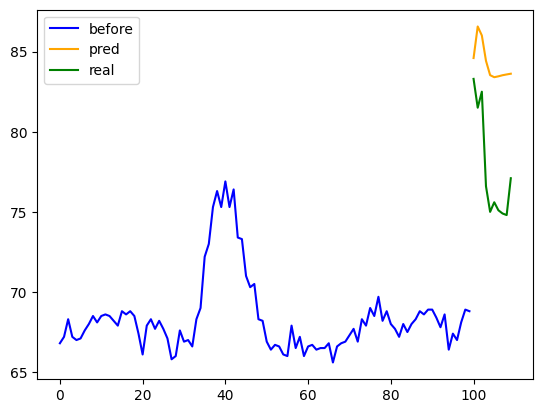

In [ ]:
left_num = 100
test_num = 10

i = 14

plt.plot(df['value'].values[-left_num-test_num:-test_num], label='before', color='blue')
plt.plot(range(left_num, left_num+test_num), pred_model2[i], label='pred', color='orange')
plt.plot(range(left_num, left_num+test_num), y_test[i], label='real', color='green')
plt.legend()

In [ ]:
model2.save('/content/drive/My Drive/ai_project/model/seq2seq_2_fs.keras')